In [86]:
# Class: CS460G - Machine Learning
# Project: Movie Reviews 
# Author: Sydney Chapman 
# Date: 11/20/2023

import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

import sklearn
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (accuracy_score, classification_report,confusion_matrix)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

import os
import re
import unicodedata


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sydneychapman/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sydneychapman/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sydneychapman/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [87]:
# Import the data
ds1 = pd.read_csv("dataprep/filtered_reviews.csv", sep=",", header = 0)

display(ds1)


,review_score,review_content
0,3/5,"Crammed with dragons, set-destroying fights an..."
1,2/5,Chris Columbus returns to his comfort zone for...
2,2/5,Although the standard allegorical bases for my...
3,3/5,You don't even have to be familiar with the fi...
4,2/5,"This is generic filmmaking at its most banal, ..."
...,...,...
50646,4/5,The animation is first rate - fur is rendered ...
50647,4/5,There's a magical moment in every movie of qua...
50648,4/5,One of the film's great strengths is the trust...
50649,4/5,The film feels like a riposte to Trump-ism. It...


In [88]:
def clean_review_txt(txt):
    txt = re.sub((r'[^\w\s]'),'', txt).lower() 
    txt = re.sub((r'\d+'),'', txt).lower()
    txt = re.sub((r'_+'),'', txt).lower()
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', ' ', txt).split()
    return ' '.join([wnl.lemmatize(word) for word in words if word not in stopwords])

In [89]:
train, test = train_test_split(ds1, test_size = 0.4)

test['review_content'] = test['review_content'].apply(lambda review: clean_review_txt(review))
train['review_content'] = train['review_content'].apply(lambda review: clean_review_txt(review))

print(train[:10])

      review_score                                     review_content
18148          5/5  stunningly brilliant intriguing screen spectac...
29858          5/5  joyous film full love warmth unafraid admit st...
10665          3/5                              good kid probably age
21100          5/5  like best new hollywood classic reference film...
11732          4/5        british tale contender football film decade
14023          4/5  every man superb movie mr herzog managed treat...
21782          2/5  there little naked desire forcibly new fantasy...
22347          4/5  many great doc made including ecstatic kid rig...
35883          4/5  silent soul slow cryptic long take mysterious ...
17815          4/5  wait worth eighth film sevenbook series see ha...


In [90]:
vect = CountVectorizer(max_features=10000)
X_train_vects = vect.fit_transform(train['review_content'])

vect.get_feature_names_out()[20:40]

array(['absolute', 'absolutely', 'absorbing', 'abstract', 'absurd',
       'absurdist', 'absurdity', 'absurdly', 'abundance', 'abuse',
       'abusive', 'abysmal', 'abyss', 'academic', 'academy', 'accent',
       'accept', 'acceptable', 'acceptance', 'accepting'], dtype=object)

In [91]:
model = MultinomialNB()
model.fit(X_train_vects, train['review_score'])

MultinomialNB()

In [92]:
model.score(X_train_vects, train['review_score'])

0.6750575847318196

In [93]:
X_test_vects = vect.fit_transform(test['review_content'])

In [94]:
y_test_hat = model.predict(X_test_vects)

In [95]:
accuracy_score(test['review_score'], y_test_hat)

0.17264695720842999

In [96]:
print(classification_report(test['review_score'], y_test_hat))

              precision    recall  f1-score   support

         1/5       0.10      0.24      0.14      1904
         2/5       0.25      0.13      0.17      5217
         3/5       0.30      0.18      0.23      6304
         4/5       0.27      0.15      0.19      5563
         5/5       0.06      0.29      0.10      1273

    accuracy                           0.17     20261
   macro avg       0.20      0.20      0.17     20261
weighted avg       0.25      0.17      0.19     20261



In [97]:
print(confusion_matrix(test['review_score'], y_test_hat))

[[ 448  283  353  267  553]
 [1186  701  992  815 1523]
 [1418  864 1152  927 1943]
 [1187  769 1036  828 1743]
 [ 260  190  268  186  369]]


Text(0.5, 23.52222222222222, 'Predicted Label')

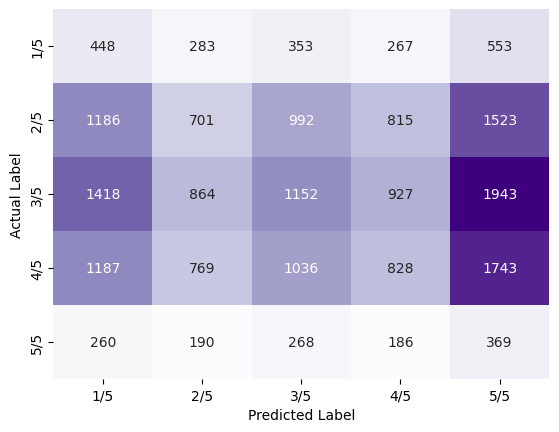

In [98]:
sea.heatmap(pd.DataFrame(confusion_matrix(test['review_score'], y_test_hat)), annot=True, cmap="Purples", fmt="d", cbar=False, xticklabels=['1/5', '2/5', '3/5', '4/5', '5/5'], yticklabels=['1/5', '2/5', '3/5', '4/5', '5/5'])
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')